# Notebook to analyze output of Grid code for SU(4)
Author: Venkitesh Ayyar (vayyar@bu.edu) \
Dec 2, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import subprocess as sp
import os 
import glob
import pandas as pd

In [3]:
# %matplotlib widget

In [4]:
%matplotlib inline

In [6]:
fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov16/dm_tests/run1/SDM.4node'

### Get Plaquette value

In [7]:
cmd="grep 'Plaq' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
print(op[0])

grep 'Plaq' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov16/dm_tests/run1/SDM.4node
Grid : Message : 110.876640 s : Plaquette: [ 1 ] 0.6689615090380521


In [8]:
cols=['iter','val','time']
df=pd.DataFrame(columns=cols)

for count,i in enumerate(op): 
    itr=int(i.split('[ ')[-1].split(' ]')[0])
    val=np.float64(i.split(' ')[-1])
    time=np.float64(i.split(': ')[2].split(' s')[0])
    dict1={'iter':itr, 'val':val, 'time':time}
#     print(dict1)
    df=pd.concat([df,pd.DataFrame(dict1,index=[count])])
    count+=1

In [9]:
df

,iter,val,time
0,1,0.668962,110.87664
1,2,0.65533,288.728567
2,3,0.598137,478.118549
3,4,0.488221,649.580487
4,5,0.532374,738.501836
...,...,...,...
87,88,0.600424,13628.220878
88,89,0.600528,13786.309745
89,90,0.599915,13943.77303
90,91,0.600429,14101.416819


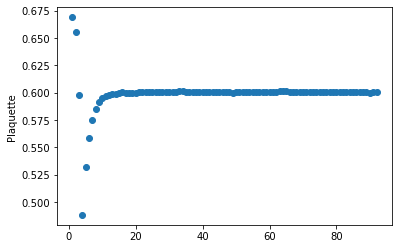

In [10]:
plt.figure()
x=df.iter.values
y=df.val.values
plt.plot(x,y,marker='o',linestyle='')
plt.ylabel('Plaquette')
plt.show()

### Get acceptance rate

In [11]:
cmd="grep 'Metropolis_test' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
print(op[0])

grep 'Metropolis_test' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov16/dm_tests/run1/SDM.4node
Grid : Message : 1474.764481 s : Metropolis_test -- ACCEPTED


In [12]:
cols=['iter','val','time']
df=pd.DataFrame(columns=cols)

for count,i in enumerate(op): 
    val=1 if (i.split(' ')[-1]=='ACCEPTED') else 0 # Accept =1 , Reject = 0
    time=np.float64(i.split(': ')[2].split(' s')[0]) 
    dict1={'iter':count, 'val':val, 'time':time}
#     print(dict1)
    df=pd.concat([df,pd.DataFrame(dict1,index=[count])])
    count+=1

In [13]:
df

,iter,val,time
0,0,1,1474.764481
1,1,1,1617.381245
2,2,1,1763.896661
3,3,0,1911.889858
4,4,1,2061.169907
...,...,...,...
77,77,1,13628.202506
78,78,1,13786.291281
79,79,1,13943.754569
80,80,1,14101.398481


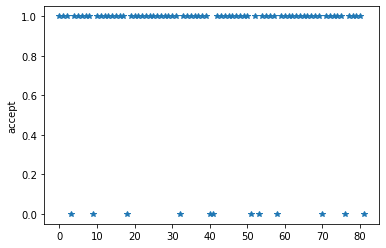

In [14]:
plt.figure()
x=df.iter.values
y=df.val.values
plt.ylabel('accept')
plt.plot(y,marker='*',linestyle='')

In [15]:
# Print Acceptance ratio
ct=df['val'].value_counts()
print(ct)

Act=ct[1]
Rft=ct[0]
print(Act* 100 /(Act+Rft),'%')

1    70
0    12
Name: val, dtype: int64
85.36585365853658 %
